Predicting word difficulty

1.Importing the libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
%matplotlib inline

2.Loading the dataset

In [60]:
data = pd.read_csv("C:\\Users\\KHN\\Desktop\\worddataset.csv")

In [61]:
data.head()

,words,no_of_char,syllable_count,Frequency_of_occurrence,"presence_of_ch,sh,th,st,f",part_of_speech,pronounce_g_j,Pronounce_c_k,overall_label
0,ABILITIES,1,1,0,0,1,0,0,0
1,ABORIGINAL,1,1,0,0,1,1,0,1
2,ABU DHABI,1,1,1,0,1,0,0,1
3,ACADEMY,1,1,1,0,1,0,1,1
4,ACCESS,0,0,1,0,1,0,1,1


3.Exploring the data

In [62]:
data.shape

(1000, 9)

In [63]:
data.columns.tolist()

['words',
 'no_of_char',
 'syllable_count',
 'Frequency_of_occurrence',
 'presence_of_ch,sh,th,st,f',
 'part_of_speech',
 'pronounce_g_j',
 'Pronounce_c_k',
 'overall_label']

In [64]:
data.dtypes

words                        object
no_of_char                    int64
syllable_count                int64
Frequency_of_occurrence       int64
presence_of_ch,sh,th,st,f     int64
part_of_speech                int64
pronounce_g_j                 int64
Pronounce_c_k                 int64
overall_label                 int64
dtype: object

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   words                      1000 non-null   object
 1   no_of_char                 1000 non-null   int64 
 2   syllable_count             1000 non-null   int64 
 3   Frequency_of_occurrence    1000 non-null   int64 
 4   presence_of_ch,sh,th,st,f  1000 non-null   int64 
 5   part_of_speech             1000 non-null   int64 
 6   pronounce_g_j              1000 non-null   int64 
 7   Pronounce_c_k              1000 non-null   int64 
 8   overall_label              1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [66]:
data.describe()

,no_of_char,syllable_count,Frequency_of_occurrence,"presence_of_ch,sh,th,st,f",part_of_speech,pronounce_g_j,Pronounce_c_k,overall_label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,0.508000,0.343000,0.716000,0.217000,1.51400,0.228000,0.257000,0.48000
std,0.500186,0.474949,0.451162,0.412409,0.83096,0.419753,0.437198,0.49985
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,1.000000,0.000000,2.00000,0.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.00000


In [67]:
data['overall_label'].value_counts(sort = False)

0    520
1    480
Name: overall_label, dtype: int64

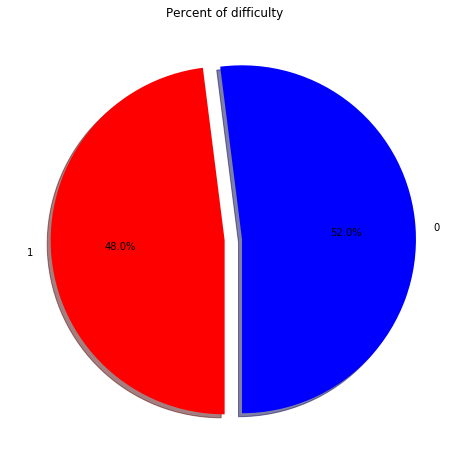

In [68]:
labels = data['overall_label'].value_counts(sort = True).index
sizes = data['overall_label'].value_counts(sort = True)
colors = ["blue","red"]
explode = (0.1,0) 
rcParams['figure.figsize'] = 8,8
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of difficulty')
plt.show()

4.Manipulating the data

4.1.Checking for missing values

In [69]:
data.isnull().sum()

words                        0
no_of_char                   0
syllable_count               0
Frequency_of_occurrence      0
presence_of_ch,sh,th,st,f    0
part_of_speech               0
pronounce_g_j                0
Pronounce_c_k                0
overall_label                0
dtype: int64

4.2.Dropping missing values

In [70]:
data.dropna(inplace = True)
#Re-check for missing values
data.isnull().sum()

words                        0
no_of_char                   0
syllable_count               0
Frequency_of_occurrence      0
presence_of_ch,sh,th,st,f    0
part_of_speech               0
pronounce_g_j                0
Pronounce_c_k                0
overall_label                0
dtype: int64

5.Get Correlation of difficullty with other variables

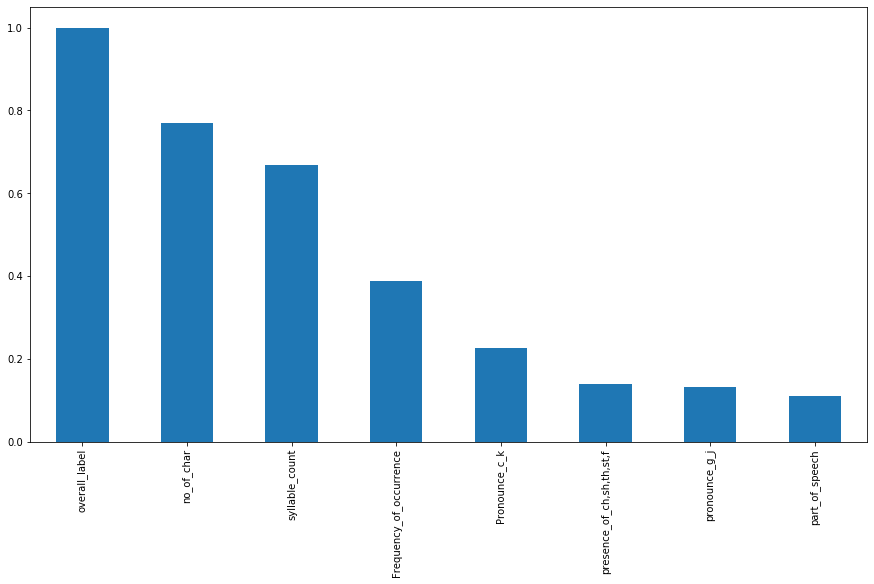

In [71]:
plt.figure(figsize=(15,8))
data.corr()['overall_label'].sort_values(ascending = False).plot(kind='bar')

In [72]:
data.corr()["overall_label"].sort_values()

part_of_speech               0.111534
pronounce_g_j                0.131486
presence_of_ch,sh,th,st,f    0.140043
Pronounce_c_k                0.227378
Frequency_of_occurrence      0.387593
syllable_count               0.667719
no_of_char                   0.769354
overall_label                1.000000
Name: overall_label, dtype: float64

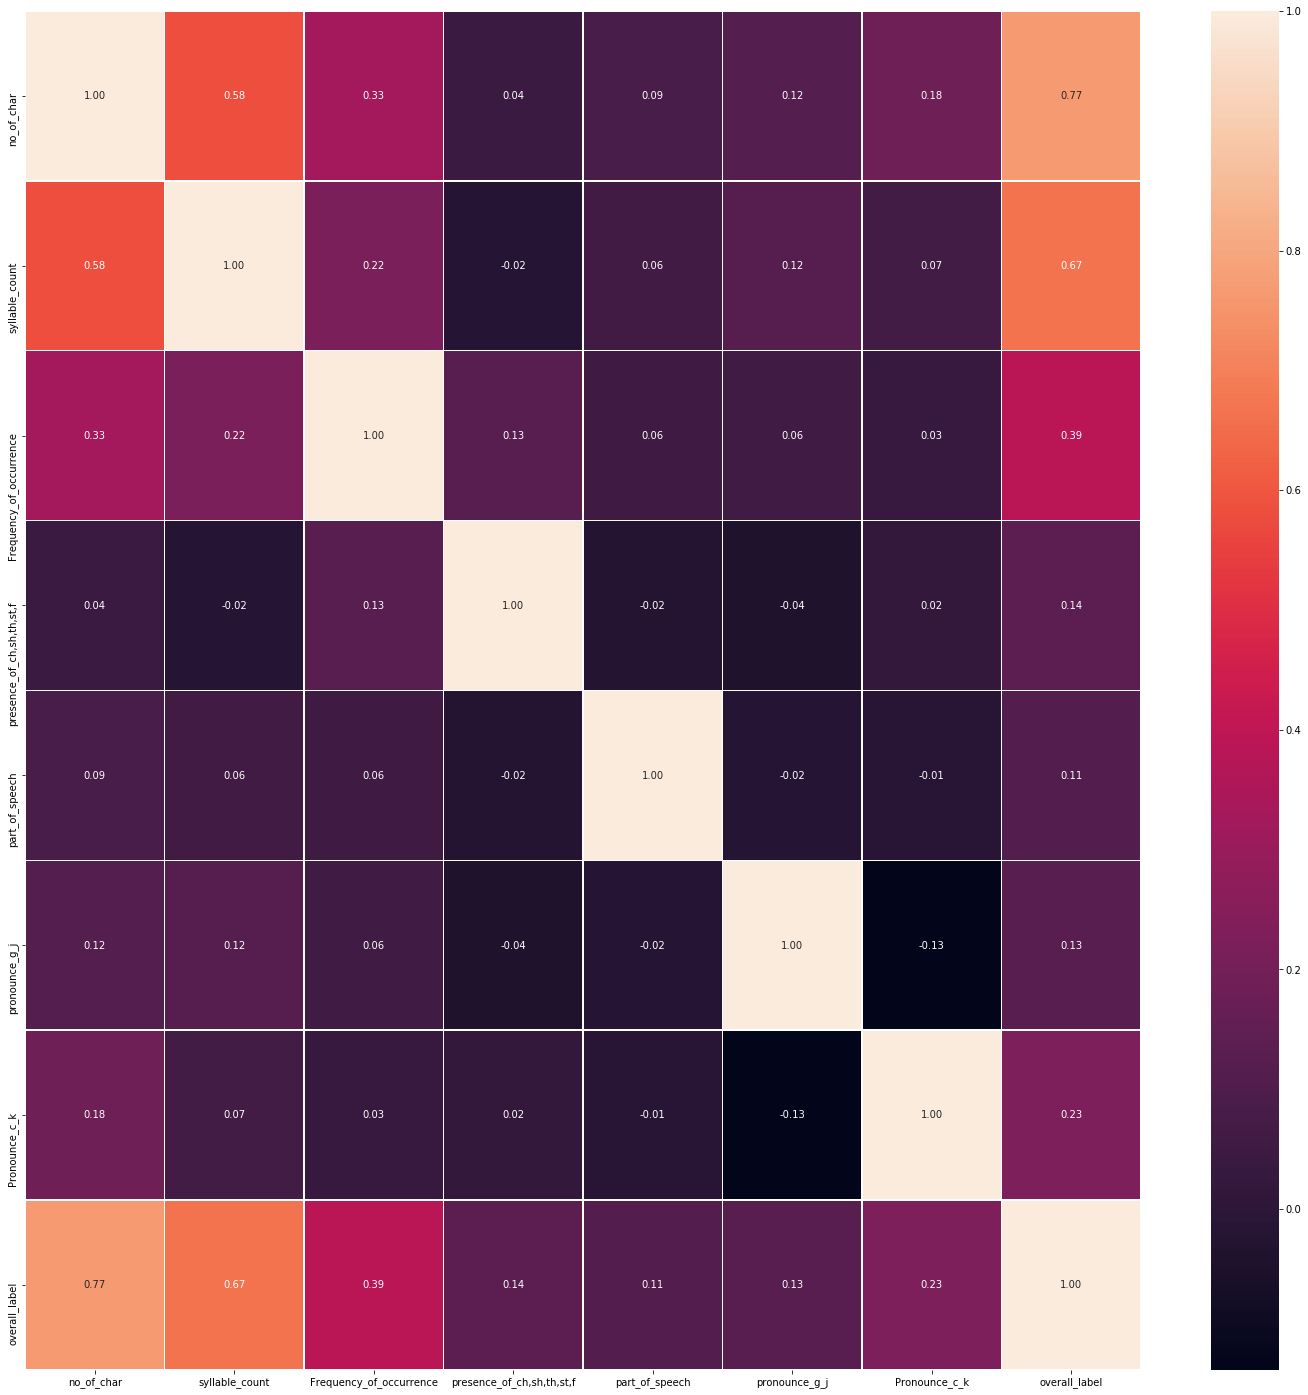

In [73]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

6.Applying Machine Learning algorithms, creating the model and train

6.1.Prepare x and y

In [74]:
# features and target
target = 'overall_label'
features = ['no_of_char', 'syllable_count', 'Frequency_of_occurrence', 'presence_of_ch,sh,th,st,f', 'part_of_speech', 'pronounce_g_j', 'Pronounce_c_k']

# X matrix, y vector
X = data[features]
y = data[target]

6.2.Splitting Data

In [75]:
#Split dataset into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 7) (800,) (200, 7) (200,)


6.3.Apply Machine Learning Algorithm - Logistic Regression Classification

In [76]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = LogisticRegression()
LogisticRegressionClassifier.fit(x_train, y_train)

y_pred = LogisticRegressionClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('LogisticRegression accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       109
           1       0.90      0.96      0.93        91

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

[[99 10]
 [ 4 87]]
LogisticRegression accuracy is 0.93


6.4.Apply Machine Learning Algorithm - Naive Bayes

In [77]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier = GaussianNB()
NaiveBayesClassifier.fit(x_train,y_train)

y_pred = NaiveBayesClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Naive Bayes accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       109
           1       0.86      0.96      0.91        91

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

[[95 14]
 [ 4 87]]
Naive Bayes accuracy is 0.91


6.5.Apply Machine Learning Algorithm - Support Vector Machine

In [78]:
# Support Vector Machine's 
from sklearn.svm import SVC

SVMClassifier = SVC()
SVMClassifier.fit(x_train, y_train)

y_pred = SVMClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('SVM accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.95      0.96      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

[[104   5]
 [  4  87]]
SVM accuracy is 0.955


6.6.Apply Machine Learning Algorithm - K-Nearest Neighbours

In [79]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNNClassifier.fit(x_train, y_train)

y_pred = KNNClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('KNN accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       109
           1       0.94      0.92      0.93        91

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

[[104   5]
 [  7  84]]
KNN accuracy is 0.94


6.7.Apply Machine Learning Algorithm - Decision Tree

In [80]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier()

DecisionTreeClassifier.fit(x_train, y_train)

y_pred = DecisionTreeClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Decision Tree accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.97      0.93      0.95        91

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

[[106   3]
 [  6  85]]
Decision Tree accuracy is 0.955


7.Evaluating the model

7.1.Confusion matrix

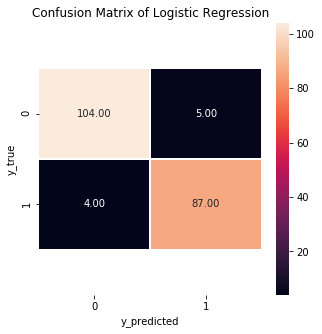

In [81]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cm_lr = confusion_matrix(y_test,SVMClassifier.predict(x_test))

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".2f", ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

7.2.Classification report

In [82]:
report = classification_report(y_test, SVMClassifier.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.95      0.96      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



8.Pickle Model

In [83]:
import pickle
pickle.dump(SVMClassifier, open('model.pkl', 'wb'))

9.Test Flask in Production

In [84]:
import requests
import json

In [85]:
# local url
url = 'http://127.0.0.1:12345'

# test data #1

data = {  
          'no_of_char': 1,
          'syllable_count': 1,
          'Frequency_of_occurrence': 0,
          'presence_of_ch,sh,th,st,f': 0,
          'part_of_speech': 1,
          'pronounce_g_j': 1,
          'Pronounce_c_k': 0
      }

data = json.dumps(data)
data

'{"no_of_char": 1, "syllable_count": 1, "Frequency_of_occurrence": 0, "presence_of_ch,sh,th,st,f": 0, "part_of_speech": 1, "pronounce_g_j": 1, "Pronounce_c_k": 0}'

In [86]:
r_survey = requests.post(url, data)
print(r_survey)

<Response [200]>


In [87]:
send_request = requests.post(url, data)
print(send_request)

<Response [200]>


In [88]:
print(send_request.json())

{'results': {'results': 1}}


10.Test App in Heroku

In [89]:
# heroku url
heroku_url = 'https://predictworddifficulty.herokuapp.com/'

# test data #1
data =  {  
          'no_of_char': 1,
          'syllable_count': 1,
          'Frequency_of_occurrence': 0,
          'presence_of_ch,sh,th,st,f': 0,
          'part_of_speech': 1,
          'pronounce_g_j': 1,
          'Pronounce_c_k': 0
      }

data = json.dumps(data)
data

'{"no_of_char": 1, "syllable_count": 1, "Frequency_of_occurrence": 0, "presence_of_ch,sh,th,st,f": 0, "part_of_speech": 1, "pronounce_g_j": 1, "Pronounce_c_k": 0}'

In [90]:
# check response code
r_survey = requests.post(heroku_url, data)
print(r_survey)

<Response [200]>


In [91]:
# get prediction
print(send_request.json())

{'results': {'results': 1}}
